In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('reduced.csv')
df = df.drop(['DIABETES','PREVAP','PREVCHD','PREVMI','PREVSTRK','PREVHYP'], axis=1)
df.head()

,SEX,AGE,SYSBP,DIABP,BPMEDS,CIGPDAY,EDUC,TOTCHOL,BMI,GLUCOSE,HEARTRTE,ANGINA,HOSPMI,MI_FCHD,ANYCHD,STROKE,CVD,HYPERTEN
0,1,39,106.0,70.0,0.0,0.0,4.0,195.0,26.97,77.0,80.0,0,1,1,1,0,1,0
1,2,46,121.0,81.0,0.0,0.0,2.0,250.0,28.73,76.0,95.0,0,0,0,0,0,0,0
2,2,52,105.0,69.5,0.0,0.0,2.0,260.0,29.43,86.0,80.0,0,0,0,0,0,0,0
3,2,58,108.0,66.0,0.0,0.0,2.0,237.0,28.50,71.0,80.0,0,0,0,0,0,0,0
4,1,48,127.5,80.0,0.0,20.0,1.0,245.0,25.34,70.0,75.0,0,0,0,0,0,0,0


In [4]:
target = df[["ANGINA"]]

In [5]:
data = df.drop(["ANGINA"], axis=1)
feature_names = data.columns
data.head()

,SEX,AGE,SYSBP,DIABP,BPMEDS,CIGPDAY,EDUC,TOTCHOL,BMI,GLUCOSE,HEARTRTE,HOSPMI,MI_FCHD,ANYCHD,STROKE,CVD,HYPERTEN
0,1,39,106.0,70.0,0.0,0.0,4.0,195.0,26.97,77.0,80.0,1,1,1,0,1,0
1,2,46,121.0,81.0,0.0,0.0,2.0,250.0,28.73,76.0,95.0,0,0,0,0,0,0
2,2,52,105.0,69.5,0.0,0.0,2.0,260.0,29.43,86.0,80.0,0,0,0,0,0,0
3,2,58,108.0,66.0,0.0,0.0,2.0,237.0,28.50,71.0,80.0,0,0,0,0,0,0
4,1,48,127.5,80.0,0.0,20.0,1.0,245.0,25.34,70.0,75.0,0,0,0,0,0,0


In [6]:
print(data.shape, target.shape)

(9310, 17) (9310, 1)


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [8]:
from keras.utils import to_categorical

Using TensorFlow backend.


In [9]:
# One-hot encoding
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)
y_train_categorical

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)

network architecture

In [10]:
from keras.models import Sequential
from keras.layers import Dense

In [11]:
# from keras import backend
# backend.clear_session()

In [12]:
# Create model and add layers
model = Sequential()
model.add(Dense(units=100, activation='relu', input_dim=17))
model.add(Dense(units=85, activation='relu'))
model.add(Dense(units=75, activation='relu'))
model.add(Dense(units=50, activation='relu'))
model.add(Dense(units=25, activation='relu'))
model.add(Dense(units=15, activation='relu'))
model.add(Dense(units=12, activation='relu'))
model.add(Dense(units=8, activation='relu'))
model.add(Dense(units=6, activation='relu'))
model.add(Dense(units=4, activation='relu'))
model.add(Dense(units=2, activation='softmax'))

In [13]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# categorical_crossentropy or binary_crossentropy?

In [14]:
model_loss, model_accuracy = model.evaluate(
    X_test, y_test_categorical, verbose=2)
print(f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

Normal Neural Network - Loss: 0.5266740668270596, Accuracy: 0.8384879723037642


In [15]:
history = model.fit(
    X_train,
    y_train_categorical,
    epochs=1000,
    shuffle=True,
    verbose=2
)

Epoch 1/1000
 - 1s - loss: 0.4577 - acc: 0.8360
Epoch 2/1000
 - 1s - loss: 0.4416 - acc: 0.8360
Epoch 3/1000
 - 1s - loss: 0.4137 - acc: 0.8360
Epoch 4/1000
 - 1s - loss: 0.3489 - acc: 0.8360
Epoch 5/1000
 - 1s - loss: 0.2698 - acc: 0.8360
Epoch 6/1000
 - 1s - loss: 0.2179 - acc: 0.8728
Epoch 7/1000
 - 1s - loss: 0.1932 - acc: 0.8861
Epoch 8/1000
 - 1s - loss: 0.1836 - acc: 0.8880
Epoch 9/1000
 - 1s - loss: 0.1760 - acc: 0.8897
Epoch 10/1000
 - 1s - loss: 0.3533 - acc: 0.8486
Epoch 11/1000
 - 1s - loss: 0.2476 - acc: 0.8589
Epoch 12/1000
 - 1s - loss: 0.2363 - acc: 0.8598
Epoch 13/1000
 - 1s - loss: 0.2402 - acc: 0.8668
Epoch 14/1000
 - 1s - loss: 0.2051 - acc: 0.8800
Epoch 15/1000
 - 1s - loss: 0.1922 - acc: 0.8846
Epoch 16/1000
 - 1s - loss: 0.1821 - acc: 0.8887
Epoch 17/1000
 - 1s - loss: 0.1814 - acc: 0.8876
Epoch 18/1000
 - 1s - loss: 0.2258 - acc: 0.8788
Epoch 19/1000
 - 1s - loss: 0.1869 - acc: 0.8913
Epoch 20/1000
 - 1s - loss: 0.1828 - acc: 0.8900
Epoch 21/1000
 - 1s - loss: 0

 - 1s - loss: 0.1348 - acc: 0.9228
Epoch 168/1000
 - 1s - loss: 0.1495 - acc: 0.9202
Epoch 169/1000
 - 1s - loss: 0.1394 - acc: 0.9262
Epoch 170/1000
 - 1s - loss: 0.1414 - acc: 0.9241
Epoch 171/1000
 - 1s - loss: 0.1374 - acc: 0.9251
Epoch 172/1000
 - 1s - loss: 0.1378 - acc: 0.9267
Epoch 173/1000
 - 1s - loss: 0.1351 - acc: 0.9249
Epoch 174/1000
 - 1s - loss: 0.1442 - acc: 0.9197
Epoch 175/1000
 - 1s - loss: 0.1422 - acc: 0.9219
Epoch 176/1000
 - 1s - loss: 0.1385 - acc: 0.9227
Epoch 177/1000
 - 1s - loss: 0.1394 - acc: 0.9234
Epoch 178/1000
 - 1s - loss: 0.1407 - acc: 0.9199
Epoch 179/1000
 - 1s - loss: 0.1363 - acc: 0.9242
Epoch 180/1000
 - 1s - loss: 0.1713 - acc: 0.9217
Epoch 181/1000
 - 1s - loss: 0.1352 - acc: 0.9267
Epoch 182/1000
 - 1s - loss: 0.1328 - acc: 0.9265
Epoch 183/1000
 - 1s - loss: 0.1386 - acc: 0.9261
Epoch 184/1000
 - 1s - loss: 0.1357 - acc: 0.9282
Epoch 185/1000
 - 1s - loss: 0.1366 - acc: 0.9237
Epoch 186/1000
 - 1s - loss: 0.1352 - acc: 0.9265
Epoch 187/1000


 - 1s - loss: 0.1001 - acc: 0.9473
Epoch 332/1000
 - 1s - loss: 0.0995 - acc: 0.9499
Epoch 333/1000
 - 1s - loss: 0.1043 - acc: 0.9459
Epoch 334/1000
 - 1s - loss: 0.0966 - acc: 0.9514
Epoch 335/1000
 - 1s - loss: 0.0967 - acc: 0.9509
Epoch 336/1000
 - 1s - loss: 0.1093 - acc: 0.9443
Epoch 337/1000
 - 1s - loss: 0.0952 - acc: 0.9506
Epoch 338/1000
 - 1s - loss: 0.0932 - acc: 0.9519
Epoch 339/1000
 - 1s - loss: 0.1019 - acc: 0.9490
Epoch 340/1000
 - 1s - loss: 0.1279 - acc: 0.9340
Epoch 341/1000
 - 1s - loss: 0.0978 - acc: 0.9499
Epoch 342/1000
 - 1s - loss: 0.0963 - acc: 0.9510
Epoch 343/1000
 - 1s - loss: 0.1437 - acc: 0.9387
Epoch 344/1000
 - 1s - loss: 0.1015 - acc: 0.9459
Epoch 345/1000
 - 1s - loss: 0.0922 - acc: 0.9529
Epoch 346/1000
 - 1s - loss: 0.0962 - acc: 0.9509
Epoch 347/1000
 - 1s - loss: 0.0958 - acc: 0.9496
Epoch 348/1000
 - 1s - loss: 0.0919 - acc: 0.9535
Epoch 349/1000
 - 1s - loss: 0.1065 - acc: 0.9441
Epoch 350/1000
 - 1s - loss: 0.0908 - acc: 0.9543
Epoch 351/1000


 - 1s - loss: 0.0971 - acc: 0.9566
Epoch 496/1000
 - 1s - loss: 0.0608 - acc: 0.9719
Epoch 497/1000
 - 1s - loss: 0.0603 - acc: 0.9691
Epoch 498/1000
 - 1s - loss: 0.0577 - acc: 0.9695
Epoch 499/1000
 - 1s - loss: 0.0715 - acc: 0.9675
Epoch 500/1000
 - 0s - loss: 0.0609 - acc: 0.9708
Epoch 501/1000
 - 1s - loss: 0.0860 - acc: 0.9605
Epoch 502/1000
 - 1s - loss: 0.0724 - acc: 0.9663
Epoch 503/1000
 - 1s - loss: 0.0762 - acc: 0.9628
Epoch 504/1000
 - 1s - loss: 0.0702 - acc: 0.9648
Epoch 505/1000
 - 1s - loss: 0.0544 - acc: 0.9734
Epoch 506/1000
 - 1s - loss: 0.0659 - acc: 0.9685
Epoch 507/1000
 - 0s - loss: 0.0672 - acc: 0.9683
Epoch 508/1000
 - 1s - loss: 0.0601 - acc: 0.9722
Epoch 509/1000
 - 1s - loss: 0.0546 - acc: 0.9719
Epoch 510/1000
 - 1s - loss: 0.0659 - acc: 0.9696
Epoch 511/1000
 - 1s - loss: 0.0705 - acc: 0.9663
Epoch 512/1000
 - 1s - loss: 0.0567 - acc: 0.9698
Epoch 513/1000
 - 1s - loss: 0.0642 - acc: 0.9696
Epoch 514/1000
 - 1s - loss: 0.0529 - acc: 0.9716
Epoch 515/1000


 - 1s - loss: 0.0489 - acc: 0.9801
Epoch 660/1000
 - 1s - loss: 0.0350 - acc: 0.9834
Epoch 661/1000
 - 1s - loss: 0.0479 - acc: 0.9778
Epoch 662/1000
 - 1s - loss: 0.0456 - acc: 0.9785
Epoch 663/1000
 - 1s - loss: 0.0466 - acc: 0.9804
Epoch 664/1000
 - 1s - loss: 0.0503 - acc: 0.9777
Epoch 665/1000
 - 1s - loss: 0.0492 - acc: 0.9781
Epoch 666/1000
 - 1s - loss: 0.0495 - acc: 0.9779
Epoch 667/1000
 - 1s - loss: 0.0543 - acc: 0.9758
Epoch 668/1000
 - 1s - loss: 0.0412 - acc: 0.9827
Epoch 669/1000
 - 1s - loss: 0.0448 - acc: 0.9795
Epoch 670/1000
 - 1s - loss: 0.0458 - acc: 0.9764
Epoch 671/1000
 - 1s - loss: 0.0343 - acc: 0.9838
Epoch 672/1000
 - 1s - loss: 0.0610 - acc: 0.9726
Epoch 673/1000
 - 1s - loss: 0.0306 - acc: 0.9855
Epoch 674/1000
 - 1s - loss: 0.0648 - acc: 0.9704
Epoch 675/1000
 - 1s - loss: 0.0384 - acc: 0.9842
Epoch 676/1000
 - 1s - loss: 0.0547 - acc: 0.9767
Epoch 677/1000
 - 1s - loss: 0.0831 - acc: 0.9630
Epoch 678/1000
 - 1s - loss: 0.0630 - acc: 0.9746
Epoch 679/1000


 - 1s - loss: 0.0364 - acc: 0.9858
Epoch 824/1000
 - 1s - loss: 0.0301 - acc: 0.9884
Epoch 825/1000
 - 1s - loss: 0.0444 - acc: 0.9824
Epoch 826/1000
 - 0s - loss: 0.0202 - acc: 0.9923
Epoch 827/1000
 - 1s - loss: 0.0600 - acc: 0.9768
Epoch 828/1000
 - 1s - loss: 0.0595 - acc: 0.9795
Epoch 829/1000
 - 1s - loss: 0.0292 - acc: 0.9883
Epoch 830/1000
 - 1s - loss: 0.1248 - acc: 0.9454
Epoch 831/1000
 - 1s - loss: 0.1366 - acc: 0.9310
Epoch 832/1000
 - 1s - loss: 0.1058 - acc: 0.9492
Epoch 833/1000
 - 1s - loss: 0.0753 - acc: 0.9693
Epoch 834/1000
 - 1s - loss: 0.0571 - acc: 0.9789
Epoch 835/1000
 - 1s - loss: 0.0502 - acc: 0.9808
Epoch 836/1000
 - 1s - loss: 0.0304 - acc: 0.9884
Epoch 837/1000
 - 1s - loss: 0.0370 - acc: 0.9848
Epoch 838/1000
 - 1s - loss: 0.0311 - acc: 0.9875
Epoch 839/1000
 - 1s - loss: 0.0496 - acc: 0.9838
Epoch 840/1000
 - 1s - loss: 0.0368 - acc: 0.9858
Epoch 841/1000
 - 1s - loss: 0.0360 - acc: 0.9873
Epoch 842/1000
 - 1s - loss: 0.0311 - acc: 0.9858
Epoch 843/1000


 - 1s - loss: 0.0116 - acc: 0.9956
Epoch 988/1000
 - 1s - loss: 0.0177 - acc: 0.9927
Epoch 989/1000
 - 1s - loss: 0.0220 - acc: 0.9926
Epoch 990/1000
 - 1s - loss: 0.0205 - acc: 0.9921
Epoch 991/1000
 - 1s - loss: 0.0416 - acc: 0.9847
Epoch 992/1000
 - 1s - loss: 0.0115 - acc: 0.9956
Epoch 993/1000
 - 1s - loss: 0.0329 - acc: 0.9894
Epoch 994/1000
 - 1s - loss: 0.0281 - acc: 0.9901
Epoch 995/1000
 - 1s - loss: 0.0220 - acc: 0.9913
Epoch 996/1000
 - 1s - loss: 0.0731 - acc: 0.9738
Epoch 997/1000
 - 1s - loss: 0.0202 - acc: 0.9928
Epoch 998/1000
 - 1s - loss: 0.0209 - acc: 0.9928
Epoch 999/1000
 - 1s - loss: 0.0312 - acc: 0.9874
Epoch 1000/1000
 - 1s - loss: 0.0326 - acc: 0.9887


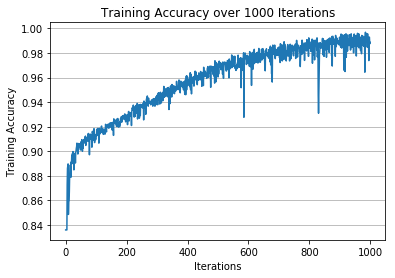

In [16]:
plt.plot(history.history['acc'])
plt.title('Training Accuracy over 1000 Iterations')
plt.ylabel('Training Accuracy')
plt.xlabel('Iterations')
plt.grid(axis='y')
# plt.ylim(0,100)

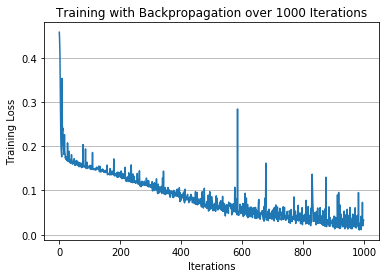

In [17]:
plt.plot(history.history['loss'])
plt.title('Training with Backpropagation over 1000 Iterations')
plt.ylabel('Training Loss')
plt.xlabel('Iterations')
plt.grid(axis='y')

In [18]:
model_loss, model_accuracy = model.evaluate(
    X_test, y_test_categorical, verbose=2)
print(f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

Normal Neural Network - Loss: 0.3673498351638977, Accuracy: 0.9102233674927676


In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
label_encoder = LabelEncoder()
label_encoder.fit(df['ANGINA'])

LabelEncoder()

In [21]:
encoded_predictions = model.predict_classes(X_test)
prediction_labels = label_encoder.inverse_transform(encoded_predictions)

c:\Users\nssas\Anaconda3\envs\PythonData\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [22]:
test_df = pd.DataFrame({'predicted':prediction_labels,'actual':np.ravel(y_test)})
test_df.head()

,predicted,actual
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [23]:
corr = 0
wron = 0

for index, row in test_df.iterrows():
    if row['predicted'] == row['actual']:
        corr = corr + 1
    else:
        wron = wron + 1
        
print(f'Correct predictions: {corr}')
print(f'Incorrect predictions: {wron}')

Correct predictions: 2119
Incorrect predictions: 209
